In [1]:
%matplotlib inline
# File formats
import ROOT
import uproot, h5py
# Data manipulation
import datetime as dt
import numpy as np
import pandas as pd
# Plotting
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
# Others
import sys, importlib
from importlib import reload
from pathlib import Path

# Add current directory to import path and import locals
pathFromHere = Path("__file__").parent.absolute()
sys.path.insert(1, pathFromHere)
import Libraries.charge_library as cl
import Libraries.light_library as ll
import Libraries.evd_library as evd

Welcome to JupyROOT 6.22/08


In [2]:
%%time
reload(cl)
reload(ll)

### FILENAMES
cpath = '/home/dporzio/Data/MichelLimited/michel_datalog_2021_04_05_17_28_34_CEST_evd_limited.h5'
lpath = '/home/dporzio/Data/MichelLimited/rwf_20210405_172833.data.root'

### LOAD LIGHT DATA
# Root
rfile = ROOT.TFile.Open(lpath, 'read')
rwf = rfile.Get('rwf')
# Uproot
ldata = (uproot.open(lpath)['rwf']).arrays(['event','sn','ch','utime_ms','tai_ns'],library='pd')
# Convert utime to a better usable format
ldata['utime_ms'] = ldata['utime_ms'].astype(np.int64)

### LOAD CHARGE DATA
cdata = h5py.File(cpath,'r')

events = cdata['events']
trigs = cdata['ext_trigs']
tracks = cdata['tracks']
hits = cdata['hits']
info = cdata['info'].attrs

print("events:",[t for t in cdata['events'].dtype.names])
print("tracks:",[t for t in cdata['tracks'].dtype.names])
print("hits:",[t for t in cdata['hits'].dtype.names])
print("ext_trigs:",[t for t in cdata['ext_trigs'].dtype.names])
print("info:",[t for t in (cdata['info'].attrs).keys()])

### LOAD GEOMETRY DATA
geometryHelper = cl.GetGeometryHelper(info)

events: ['evid', 'track_ref', 'hit_ref', 'nhit', 'q', 'ts_start', 'ts_end', 'ntracks', 'ext_trig_ref', 'n_ext_trigs', 'unix_ts', 'q_raw']
tracks: ['track_id', 'event_ref', 'hit_ref', 'theta', 't0', 'phi', 'xp', 'yp', 'nhit', 'q', 'ts_start', 'ts_end', 'residual', 'length', 'start', 'end', 'q_raw', 't0_type']
hits: ['hid', 'px', 'py', 'ts', 'q', 'iochannel', 'iogroup', 'chipid', 'channelid', 'geom', 'event_ref', 'q_raw']
ext_trigs: ['trig_id', 'event_ref', 'ts', 'type']
info: ['clock_period', 'configuration_file', 'electron_lifetime_file', 'geometry_file', 'pedestal_file', 'source_file', 'vdrift']
CPU times: user 4.41 s, sys: 807 ms, total: 5.22 s
Wall time: 8.39 s


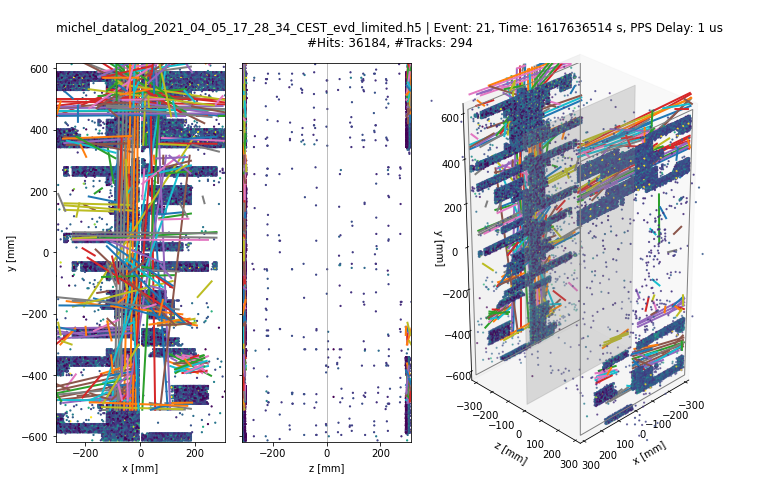

In [102]:
reload(evd)
reload(cl)

evd.SmallEventDisplay(21,cpath,cdata,geometryHelper,rot=45,showTracks=True)